In [21]:
import torch


x = torch.arange(-5,5, dtype=torch.float)
x

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.])

In [22]:
def f(x, w):
    a, b, c = w
    return a*(x**2) + b*x + c

def loss(pred, target):
    return (pred - target).pow(2).mean()

target = f(x, torch.tensor([1, 2, 3], dtype=torch.float))
target

tensor([18., 11.,  6.,  3.,  2.,  3.,  6., 11., 18., 27.])

In [41]:
from fastai.torch_core import to_np
from matplotlib import pyplot as plt


def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(x, target)
    ax.scatter(x, to_np(preds), color='red')
    ax.set_ylim(-30,30)

(tensor([21.8751, 12.7270,  5.8964,  1.3834, -0.8121, -0.6901,  1.7495,  6.5066,
         13.5813, 22.9734], grad_fn=<AddBackward0>),
 tensor(11.6143, grad_fn=<MeanBackward0>))

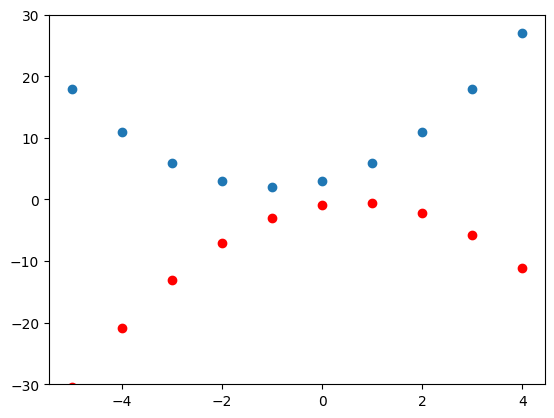

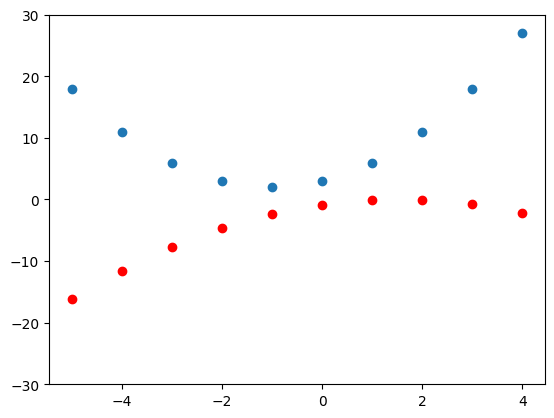

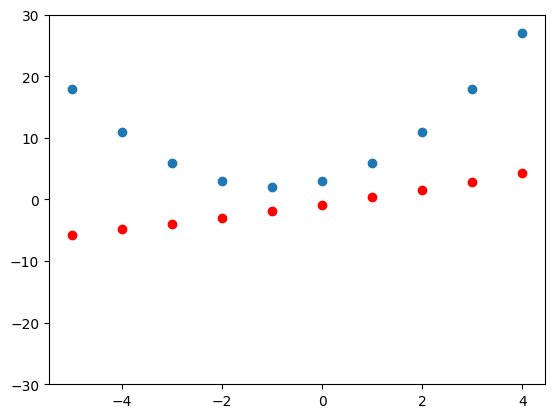

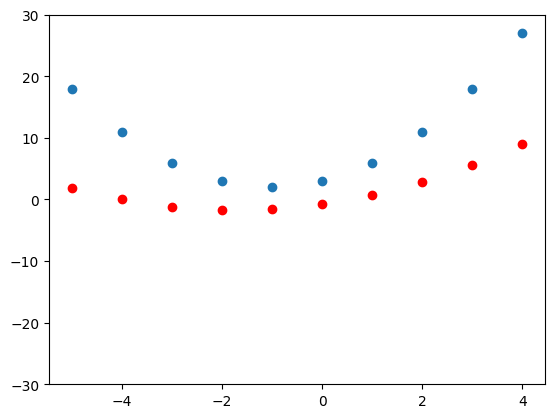

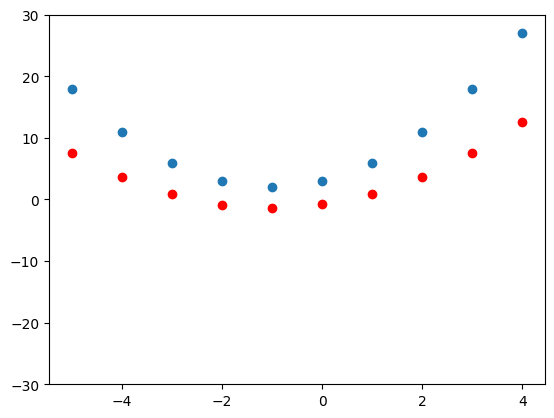

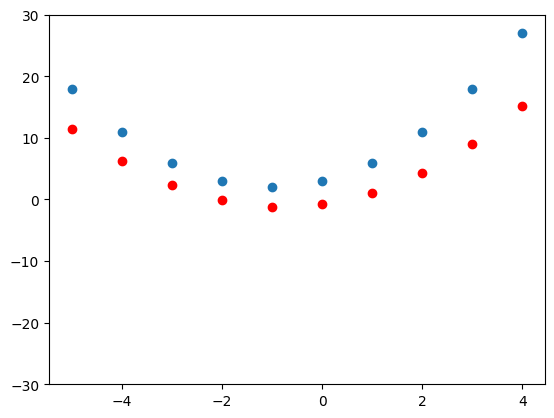

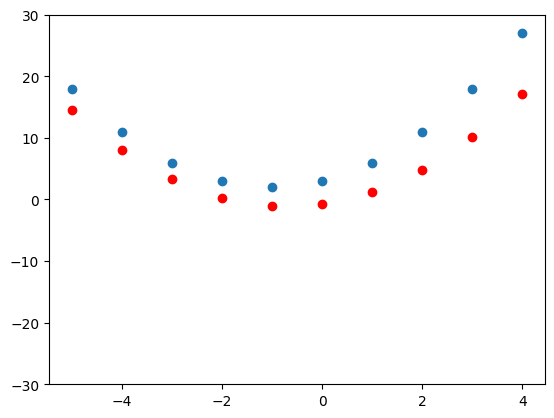

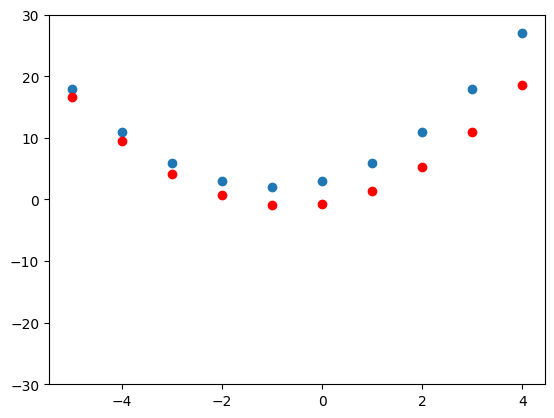

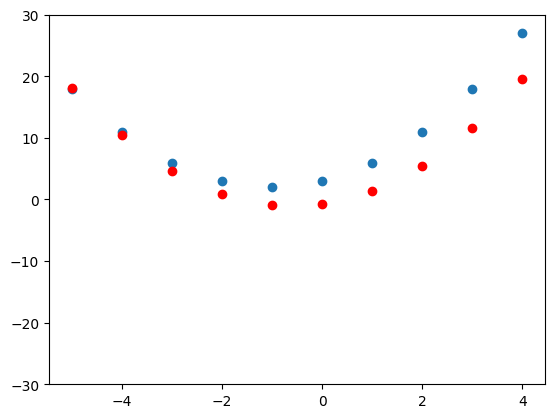

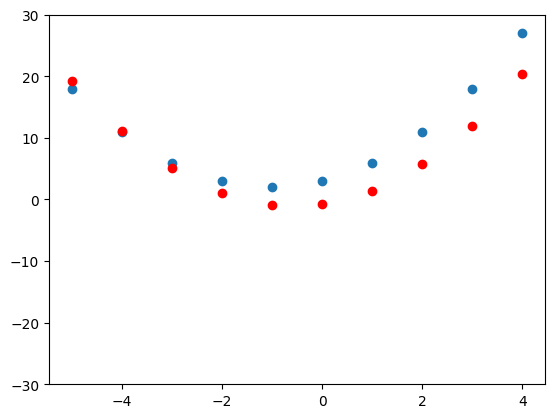

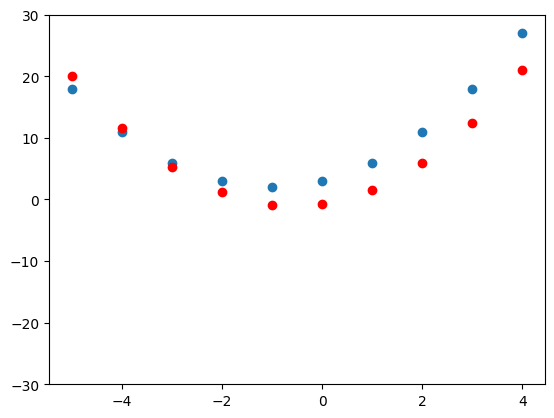

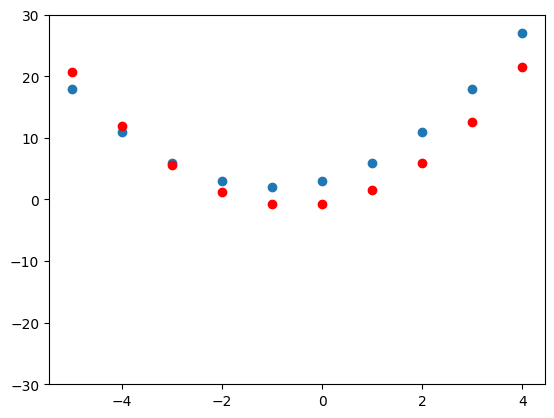

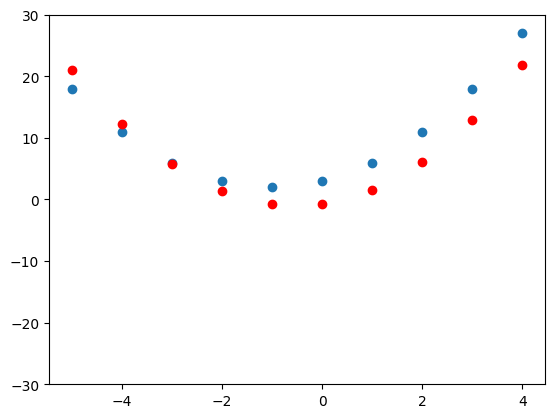

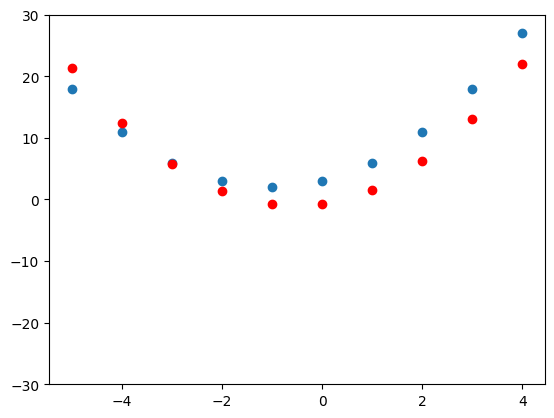

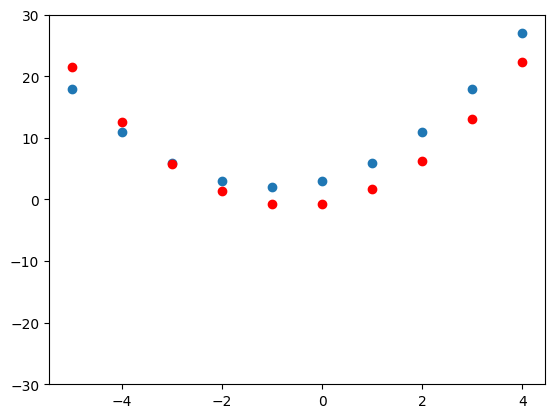

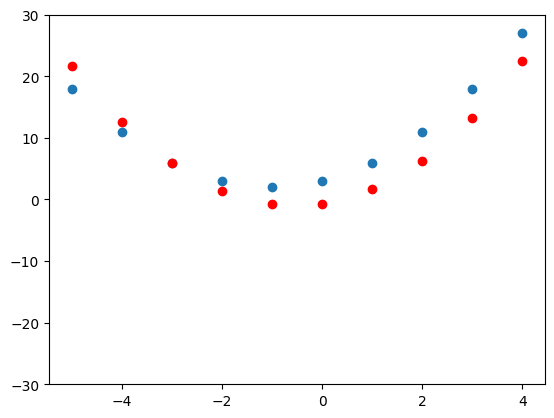

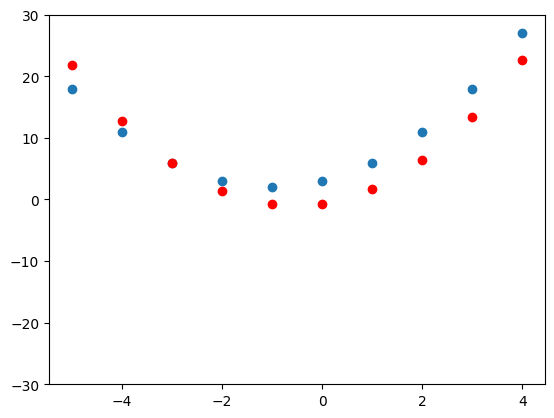

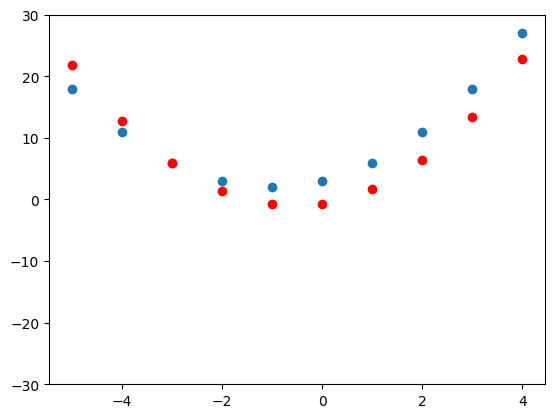

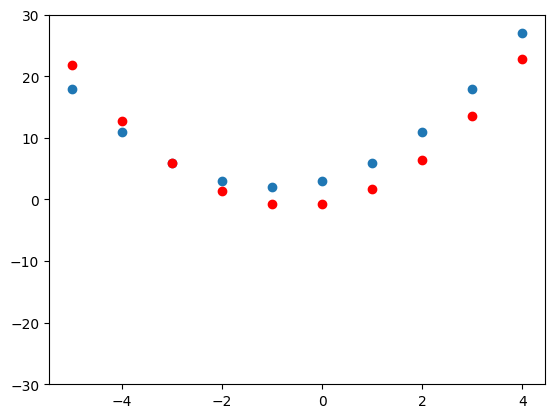

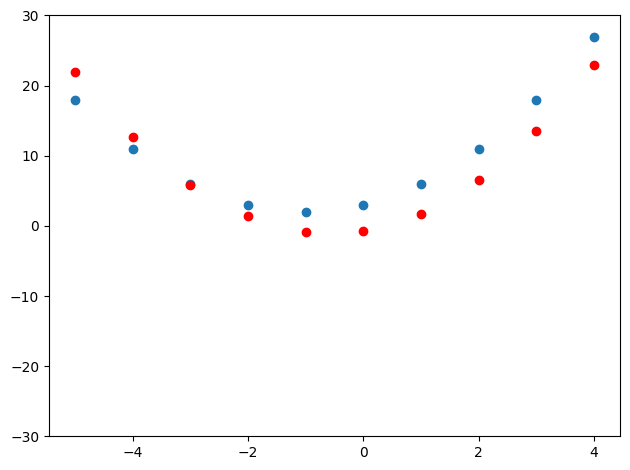

In [43]:
w = torch.randn(3, requires_grad=True)
learningRate = 0.001

for i in range(0, 20):
    pred = f(x, w)
    # print('***********************\n')
    # print(f'Pred : {pred}')
    l = loss(pred, target)
    # print(f'Loss : {l}')
    show_preds(pred)
    l.backward()
    with torch.no_grad():
        w.data -= learningRate * w.grad.data
        w.grad = None
        # print(f'New weights : {w}')
        # w.grad.zero_()
plt.tight_layout()
pred, l

In [17]:
xv = torch.tensor([5])

xv * w

tensor([ 2.0643,  4.9345, 10.0000, 15.0000], grad_fn=<MulBackward0>)

tensor([2, 4, 6, 8])